In [1]:
import os 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
direction_path = "Training"
test_path = "Testing"
new_direction_path = "ProcessedImages"
folders_names = sorted(os.listdir(direction_path))
test_folders_names = sorted(os.listdir(test_path))
print(folders_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
import cv2
def preprocess_mri(files_paths):
    # Load the image using OpenCV
    image = cv2.imread(files_paths, cv2.IMREAD_GRAYSCALE)

    # Intensity normalization
    normalized_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply a Gaussian smoothing filter with a sigma of 2mm
    smoothed_image = cv2.GaussianBlur(normalized_image, (0, 0), 2)

    # Write the preprocessed image to disk
    new_folder_paths = new_direction_path + files_paths
    cv2.imwrite(new_folder_paths, smoothed_image)

In [4]:
# Define a function to load and preprocess the images
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (256, 256))  # Resize to a fixed size
    img = img.flatten()  # Flatten the image into a 1D array
    return img

In [5]:
def get_filesList(folders_names,direction_path):
    files_paths,labels =[],[]
    # Load and preprocess the image data
    X = []
    y = []
    for folder in folders_names:
        class_path = os.path.join(direction_path, folder)
        file_list = sorted(os.listdir(class_path))
        for file in file_list:
            file_path= os.path.join(class_path, file)

            preprocess_mri(file_path)
            X.append(load_image(file_path))
            y.append(folder) 

            files_paths.append(file_path)
            labels.append(folder)

    return files_paths,labels,X,y

In [6]:

files_paths,labels,X,y= get_filesList(folders_names,direction_path)
# print(files_paths)


In [7]:
def obtain_dataframe(files_paths,labels):

    dataframe = pd.DataFrame({
        'image_path' : files_paths,
        'label' : labels
    })

    return dataframe




In [8]:
df = obtain_dataframe(files_paths,labels)
print(df)

                             image_path      label
0      Training\glioma\Tr-glTr_0000.jpg     glioma
1      Training\glioma\Tr-glTr_0001.jpg     glioma
2      Training\glioma\Tr-glTr_0002.jpg     glioma
3      Training\glioma\Tr-glTr_0003.jpg     glioma
4      Training\glioma\Tr-glTr_0004.jpg     glioma
...                                 ...        ...
5707  Training\pituitary\Tr-pi_1452.jpg  pituitary
5708  Training\pituitary\Tr-pi_1453.jpg  pituitary
5709  Training\pituitary\Tr-pi_1454.jpg  pituitary
5710  Training\pituitary\Tr-pi_1455.jpg  pituitary
5711  Training\pituitary\Tr-pi_1456.jpg  pituitary

[5712 rows x 2 columns]


In [9]:
number_classes = len(df['label'].unique())
print(f"we have {number_classes} classes")
print(f"we have {df.shape[0]} images")

we have 4 classes
we have 5712 images


In [10]:
df['label'].value_counts()

label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

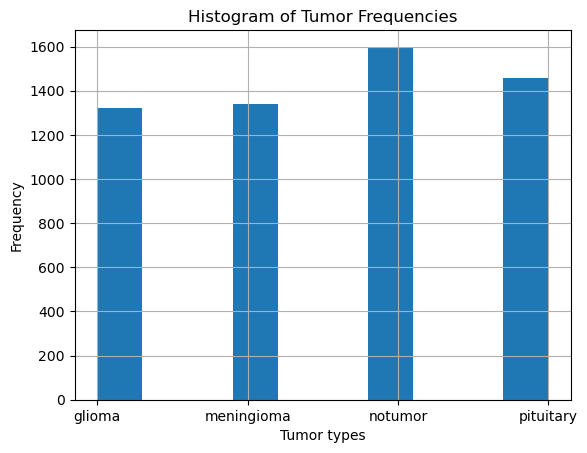

In [11]:
df['label'].hist()
# set plot labels
plt.xlabel('Tumor types')
plt.ylabel('Frequency')
plt.title('Histogram of Tumor Frequencies')

# show the plot
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the names and transform the names to numbers
Y = le.fit_transform(y)



X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



Accuracy 0.9343832020997376


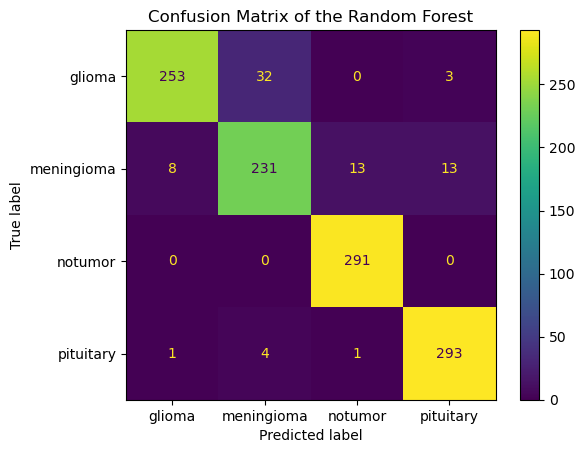

In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  r2_score
# train with random forest 
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)


y_pred_rf = RF.predict(x_test)

accuracy_rf = accuracy_score(y_test,y_pred_rf)
val_rf = r2_score(y_test,y_pred_rf)*100
print("Accuracy",accuracy_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
recall_rf = cm_rf[0][0]/(cm_rf[0][0] +cm_rf[0][1])
precision_rf = cm_rf[0][0]/(cm_rf[0][0]+cm_rf[1][1])

from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['glioma', 'meningioma', 'notumor', 'pituitary'])

cm_display.plot()
plt.title("Confusion Matrix of the Random Forest")
plt.show()


In [14]:
# train with swm model 
svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

val_svm = r2_score(y_test, y_pred_svm)*100

print("Accuracy of SVM model:", accuracy_svm)
cm_svm = confusion_matrix(y_test,y_pred_svm)



recall_svm = cm_svm[0][0]/(cm_svm[0][0] +cm_svm[0][1])
precision_svm= cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])


Accuracy of SVM model: 0.8661417322834646


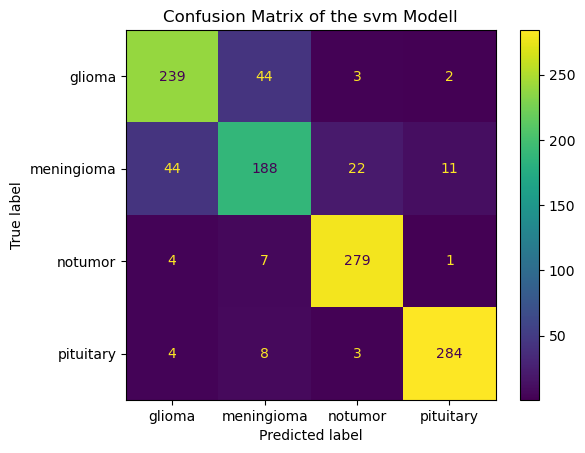

In [15]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels =['glioma', 'meningioma', 'notumor', 'pituitary'])

cm_display.plot()
plt.title("Confusion Matrix of the svm Modell")
plt.show()

In [16]:
# train with knn model 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

val_knn = r2_score(y_test, y_pred_knn)*100
print("Accuracy of KNN model:", accuracy_knn)

cm_knn = confusion_matrix(y_test,y_pred_knn)



recall_knn = cm_knn[0][0]/(cm_knn[0][0] +cm_knn[0][1])
precision_knn= cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])


Accuracy of KNN model: 0.8985126859142607


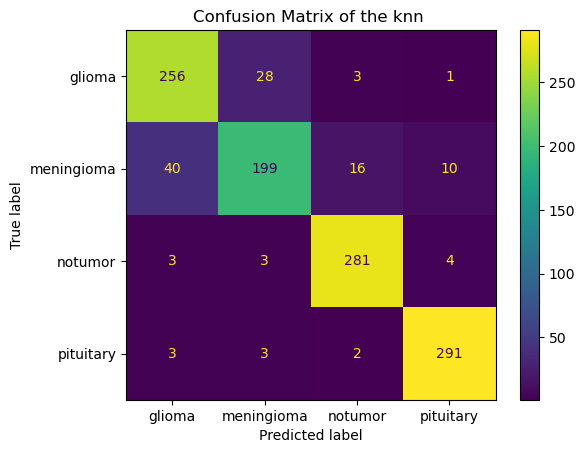

In [17]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = ['glioma', 'meningioma', 'notumor', 'pituitary'])

cm_display.plot()
plt.title("Confusion Matrix of the knn ")
plt.show()

## model Evaluation

In [18]:
report = classification_report(y_test, y_pred_svm) # for svm model
print(report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       288
           1       0.76      0.71      0.73       265
           2       0.91      0.96      0.93       291
           3       0.95      0.95      0.95       299

    accuracy                           0.87      1143
   macro avg       0.86      0.86      0.86      1143
weighted avg       0.86      0.87      0.86      1143



In [19]:
score = [val_rf,val_svm,val_knn]
#make variabel for save the result and to show it
classifier = ('Random Forest','Svm','Knn')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2]
[89.17058041860754, 80.87716415690826, 85.94917079629461]


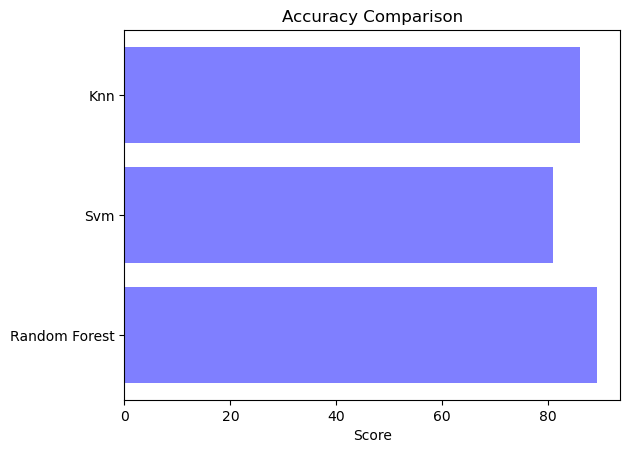

In [20]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [21]:
results ={'Accuracy': [accuracy_rf*100,accuracy_svm*100,accuracy_knn*100],
 'Recall':[recall_rf*100,recall_svm*100,recall_knn*100],
 'Precision': [precision_rf*100,precision_svm*100,precision_knn*100]}
index = ['Random Forest','Svm','Knn']

In [22]:
results =pd.DataFrame(results,index=index)

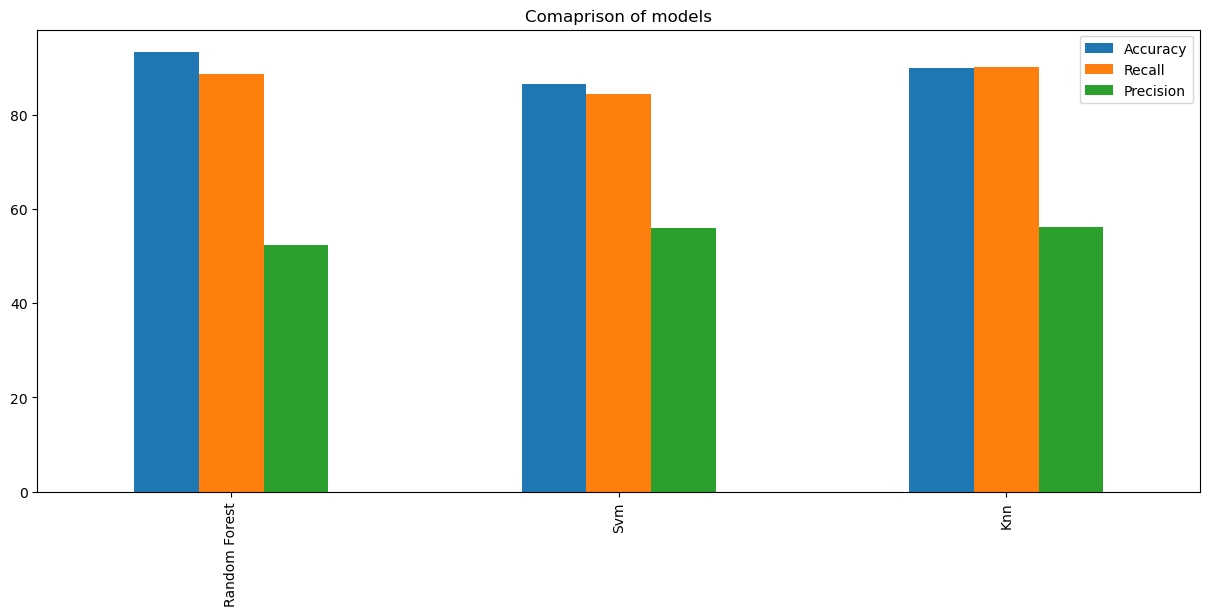

In [23]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(15,6)).get_figure()
fig.savefig('acc.png')

## Visualization

In [24]:
# corrmat = df.corr()
# plt.subplots(figsize=(18,18))
# sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu")
# plt.savefig('Downloads\correlation_map.png')